In [47]:
# Imports
import numpy as np
from scipy.linalg import svd

# Singular Value Decomposition

In [50]:
# define a matrix
A = np.array([[3, 3, 2],[2, 3, -2]])

In [51]:
print(A)

[[ 3  3  2]
 [ 2  3 -2]]


In [52]:
# perform svd
U, singular, V_transpose = svd(A)

In [53]:
# print different components
print("U:",U)
print("Singular array",s)
print("V^{T}",V_transpose)

U: [[0.78 -0.62]
 [0.62 0.78]]
Singular array [16.85 1.07 0.00]
V^{T} [[0.65 0.76 0.06]
 [-0.11 0.17 -0.98]
 [-0.75 0.63 0.19]]


# Calculate Pseudo inverse

In [54]:
# Onverse of singular matrix is just the reciprocal of each element
singular_inv = 1.0 / singular

In [55]:
# create m x n matrix of zeroes and out singular vaues in it
s_inv = np.zeros(A.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]

In [56]:
# calculate pseudoinverse
M = np.dot(np.dot(V_transpose.T,s_inv.T),U.T)

In [57]:
print(M)

[[0.11 0.04]
 [0.07 0.13]
 [0.22 -0.26]]


# SVD on image compression

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray

In [60]:
cat = data.chelsea()

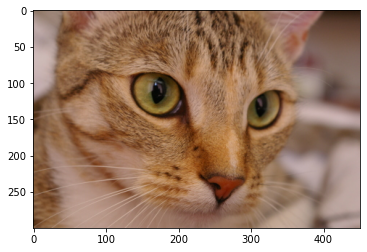

In [61]:
plt.imshow(cat)

In [62]:
# convert to grayscale
gray_cat = rgb2gray(cat)

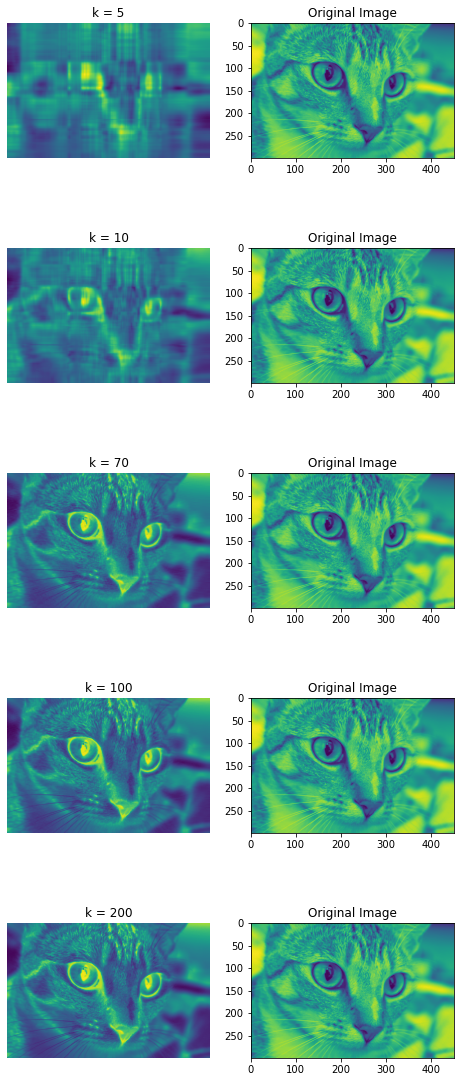

In [63]:
# calculate the SVD and plot the image
U,S,V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig=0

for r in [5, 10, 70, 100, 200]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(256-cat_approx)
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig][0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat)
    ax[curr_fig][0].axis('off')
    
    curr_fig +=1
plt.show()
    